<a href="https://colab.research.google.com/github/ctalamilla/uba-ceia-apdmq1-tpfinal/blob/main/ceia_apdm1_tpfinal_Polvo_Mina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo práctico final Apredizaje de Máquinas



##Integrantes

a1822 Cristian Patricio Salinas Talamilla

a1812 Ezequiel Eduardo Maudet

a1811 Marcelo Adrián Más Valdecantos

a1806 Lucas Fajardo

a1826 Sebastian Carreras

## Información sobre el dataset

Los datos provienen de varias estaciones meteorologicas ubicadas al rededor de una mina.
El analisis de laboratorio de los datos de las estaciones meteorologicas demoran 20 dias en reportar los resultados de si el contenido de polvo en la atmosfera esta por arriba de los niveles permitidos.
Este algoritmo busca predecir si el nivel de polvo esta por arriba o no del limite permitido utilizando mediciones indirectas e instantaneas de las estaciones meteorológicas para tomar medidas de mitigación. Inmediatas y no luego de 20 días como se hace normalmente y donde las condiciones del clima cambiaron al momento de la toma de decisión.

Contexto:
Mina XXX posee una red de monitoreo ambiental la cual permite medir los impactos ambientales de la actividad. En el presente repositorio se trabajará solo con las mediciones de polvo ambiental (PM10 - material particulado menor a 10 micrones).

El proyecto minero cuenta con mediciones de PM10 desde el año 2008 hasta la actualidad. La frecuencia de monitoreo ha variado con el pasar de los años pero siempre al menos se han colecado 3 muestras por mes de cada sitio.

El objetivo de estas mediciones es conocer el impacto del proyecto minero en el ambiente en lo relacionado a la generación de emisiones de PM10. En el siguiente gráfico se puede apreciar las mediciones del sitio NP3 a lo largo del tiempo. Cabe destacar que el nivel regulatorio establece que por encima de los 150 ugr/m3 se considera un impacto que debe ser controlado.

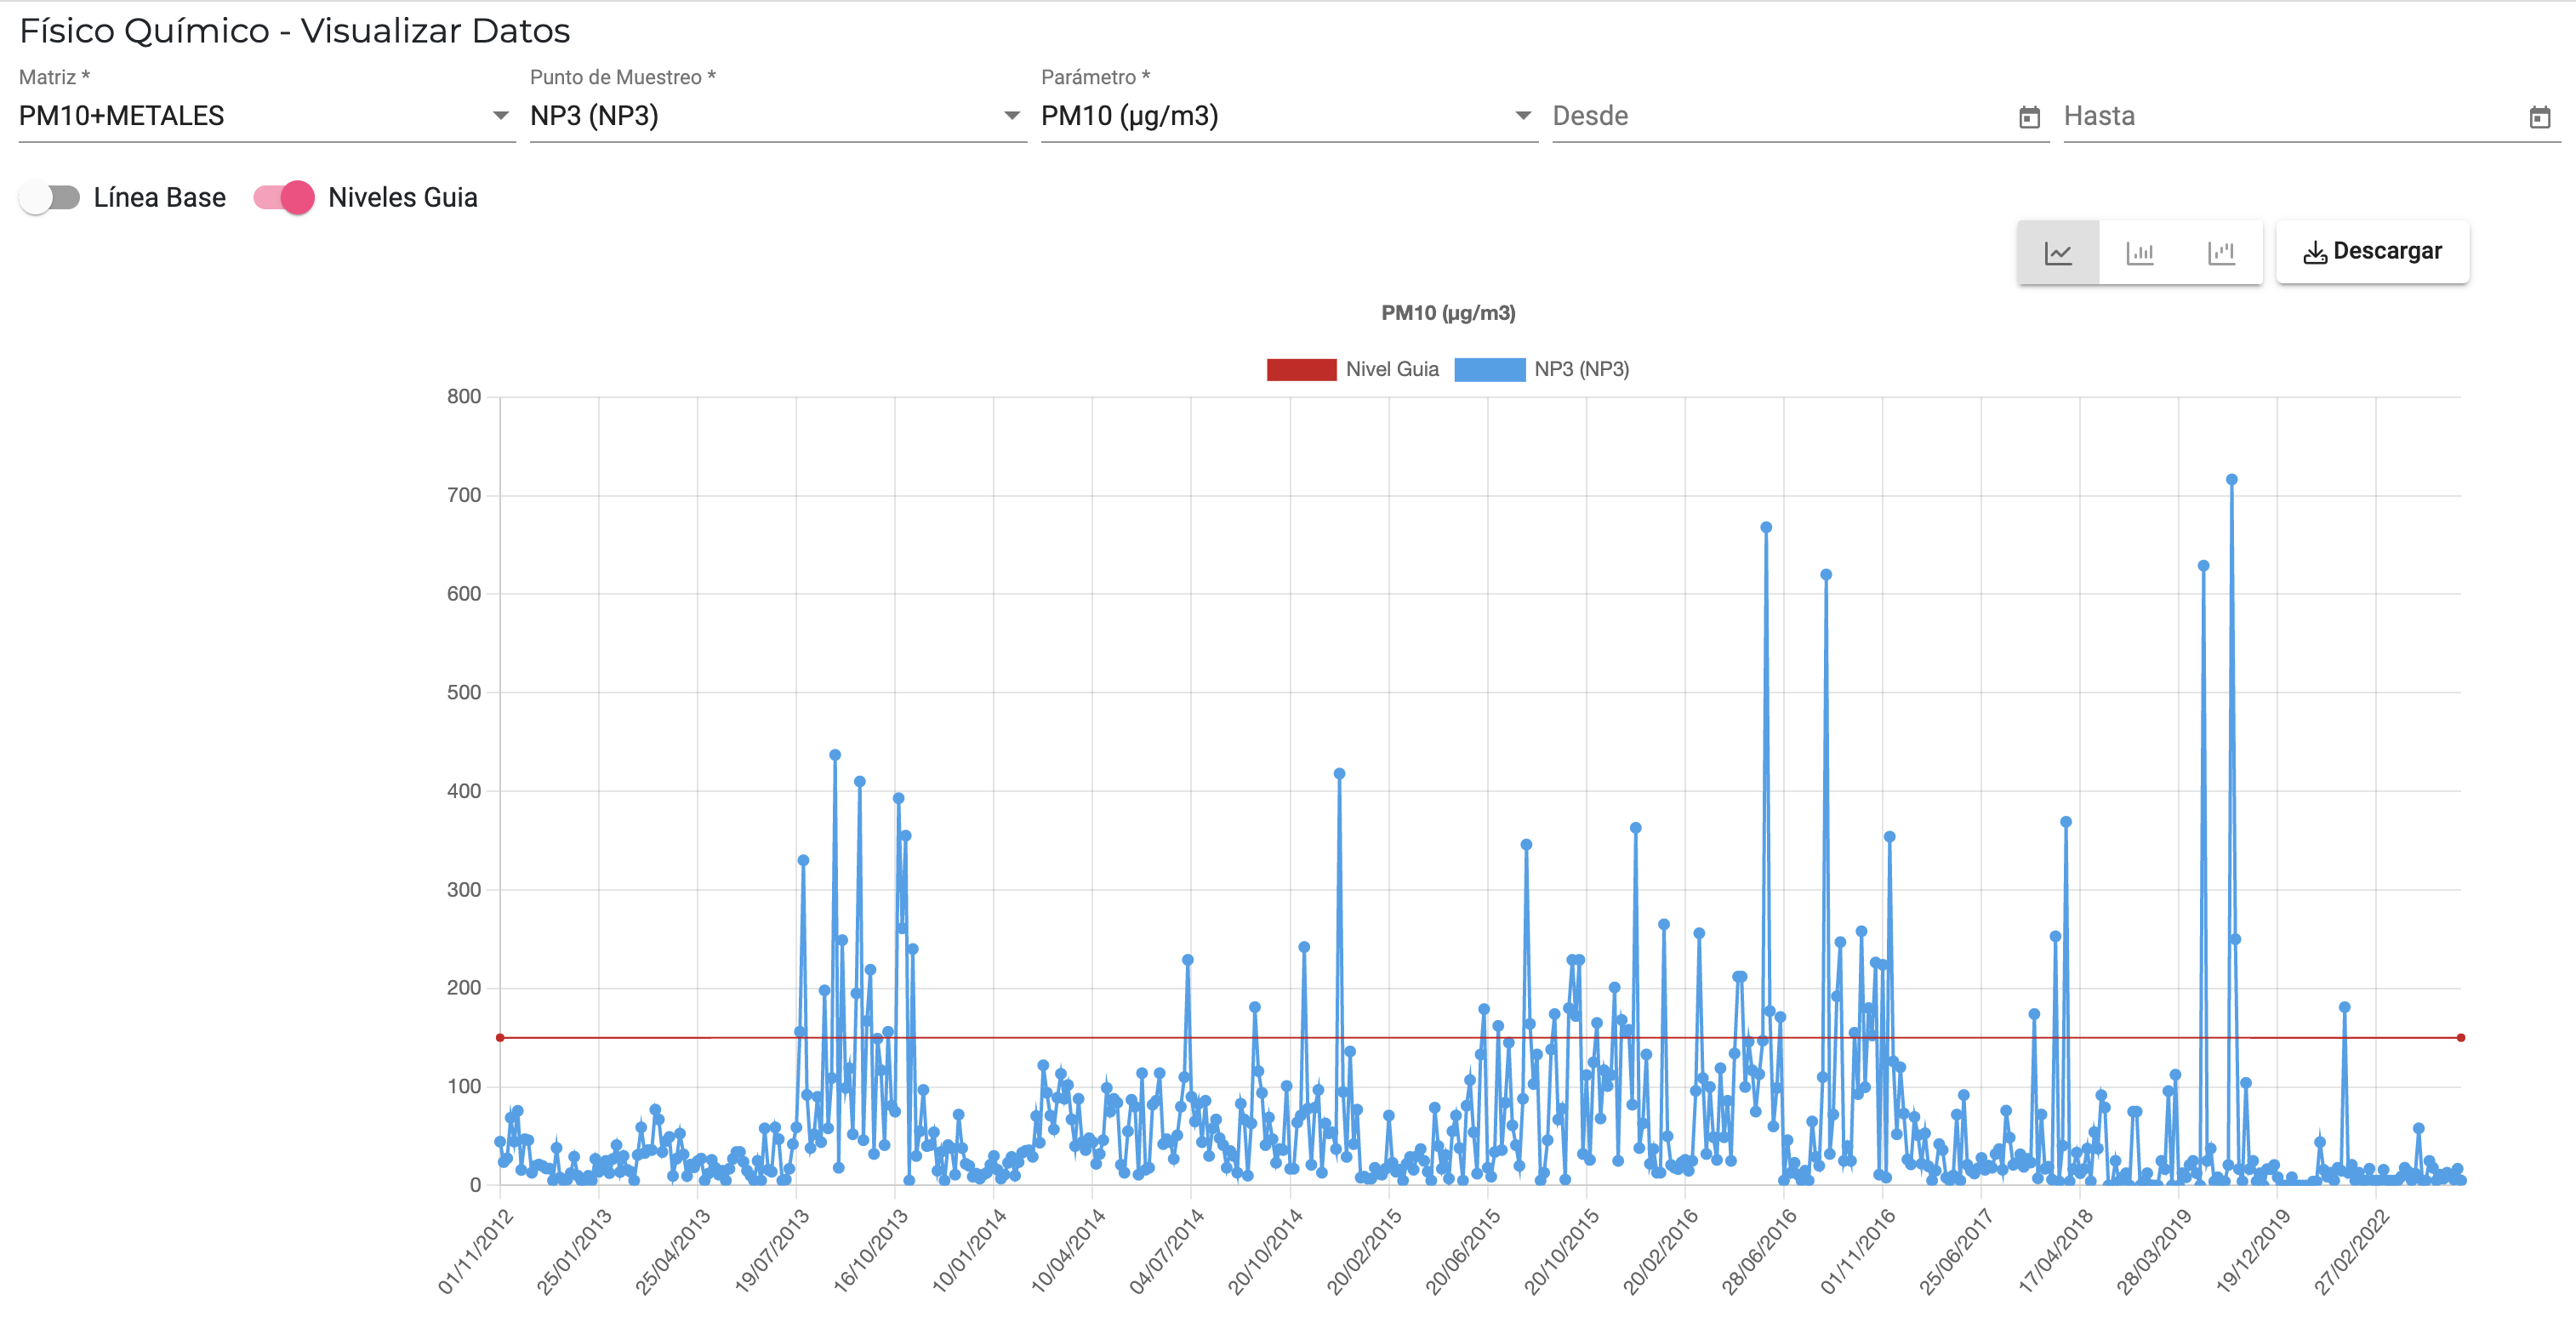

Las mediciones de PM10 están fuertemente relacionadas con las variables climaticas y con el impacto de la actividad minera. Es decir, los dias o las temporadas de mayor viento y sequedad es cuando mayores valores de PM10 se han registrado.

Haciendo uso de herramientas de ML se intentará predecir si el valor de PM10 está por encima de 150 ug/m3 a partir de variables climaticas o meteorologias. Es necesario destacar que la empresa cuenta con una estación meteorológica con datos en tiempo real de las condiciones atmosféricas.

De esta manera y de manera conceptual el trabajo de busca entrenar un modelo a partir del registro historico de PM10 y las variables meteorológicas como lo muestra la siguiente figura.

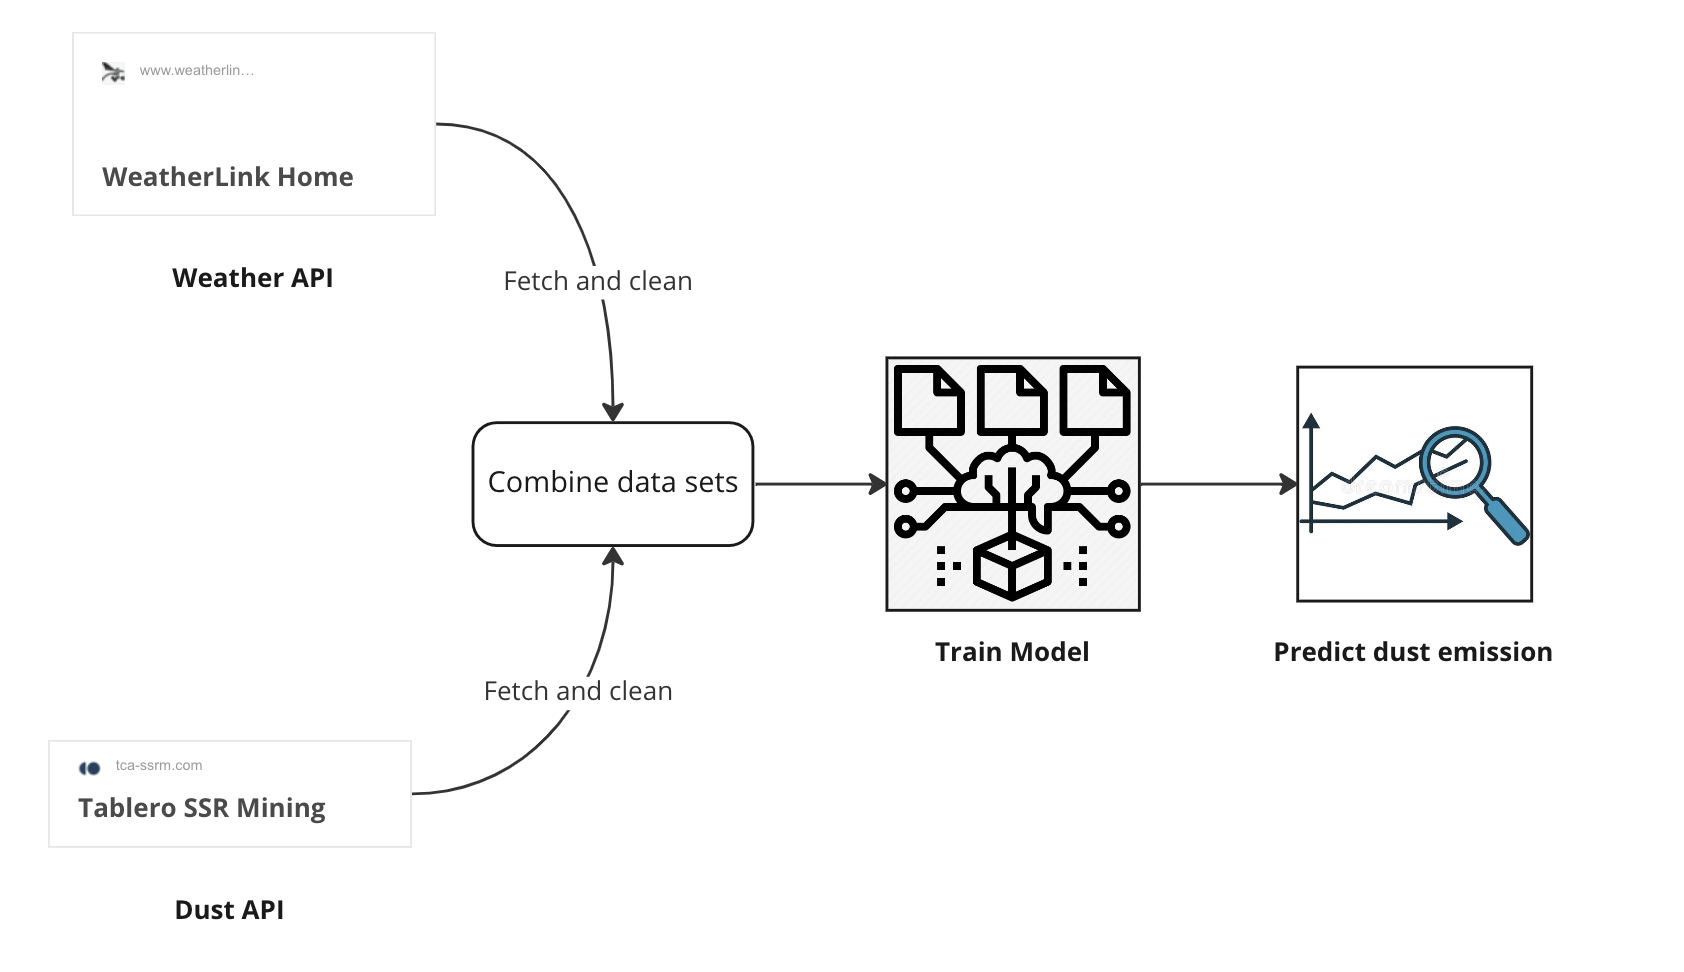

Con esta información se entrenara un modelo de clasificación para predecir, a partir de los datos de la estación meteorológica, si el valor de PM10 estará por encima de los 150 ugr/m3.

Es necesario resaltar que de acuerdo con el método de muestro de PM10 es necesario contar con instrumentos especificos y con analisis de laborario lo cual demora en la obtención del resultado. Es decir, a la empresa de demanda al menos 20 dias entre que colectó una muestra de PM10 hasta que obtiene el resultado. Este tiempo no permite tomar decisiones a tiempo para controlar los impactos.

De acuerdo a esto la principal importancia del modelo radica en estimar, con cierta insertidumbre conocida, a partir de las variables atmosféricas el comportamiento de la generación de polvo. Esto permitiría obtener información sincronizada con la estación meteorológica y no depender del resultado de laboratorio.

El trabajo de ETL (extraccion, transformacion y carga) esta desarrollado en la siguiente notebook:
https://colab.research.google.com/drive/1NwpRFfKccns_u2IiYayqKOn-4_o95FMd?usp=sharing



In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM' -O df_merged.csv

--2024-12-15 12:51:01--  https://docs.google.com/uc?export=download&id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM
Resolving docs.google.com (docs.google.com)... 142.251.16.100, 142.251.16.113, 142.251.16.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM&export=download [following]
--2024-12-15 12:51:01--  https://drive.usercontent.google.com/download?id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 958834 (936K) [application/octet-stream]
Saving to: ‘df_merged.csv’

df_merged.csv       100%[===================>] 936.36K  --.-KB/s    i

In [9]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&confirm=t&id=1jxILaVPN7JbDw3uzYzWl5zc7vkjARXPw' -O archivo_descargado.py


--2024-12-15 12:59:56--  https://drive.google.com/uc?export=download&confirm=t&id=1jxILaVPN7JbDw3uzYzWl5zc7vkjARXPw
Resolving drive.google.com (drive.google.com)... 172.253.63.113, 172.253.63.102, 172.253.63.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jxILaVPN7JbDw3uzYzWl5zc7vkjARXPw&export=download [following]
--2024-12-15 12:59:56--  https://drive.usercontent.google.com/download?id=1jxILaVPN7JbDw3uzYzWl5zc7vkjARXPw&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2424 (2.4K) [text/html]
Saving to: ‘archivo_descargado.py’

archivo_descargado. 100%[===================>]   2.37K  --.-KB/

In [7]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1uT5XQbPw5xTqv1iEIImZNzkJT_y9J1bz' -O auxiliary.py

--2024-12-15 12:56:32--  https://drive.google.com/uc?export=download&id=1uT5XQbPw5xTqv1iEIImZNzkJT_y9J1bz
Resolving drive.google.com (drive.google.com)... 142.251.163.138, 142.251.163.139, 142.251.163.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1uT5XQbPw5xTqv1iEIImZNzkJT_y9J1bz&export=download [following]
--2024-12-15 12:56:32--  https://drive.usercontent.google.com/download?id=1uT5XQbPw5xTqv1iEIImZNzkJT_y9J1bz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2424 (2.4K) [text/html]
Saving to: ‘auxiliary.py’

auxiliary.py        100%[===================>]   2.37K  --.-KB/s    in 0s     

In [4]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from auxiliary import plot_boundary, plot_svm_margins
import optuna
import seaborn as sns

SyntaxError: invalid syntax (auxiliary.py, line 1)

##Primer analisis de los datos

In [ ]:
df_polvo = pd.read_csv('df_merged.csv')

In [ ]:
df_polvo.head(3)

,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WDir,WRun,WHSpeed,...,ET,WSamp,WTx,iRecept,arcInt,WDir_deg,HWDir_deg,Punto,Polvo_PM10,clase
0,2008-02-23,9.800000,18.3,2.7,53.0,-0.058140,7.337500,E,176.18,69.2,...,5.13,28825,1,86.533333,30,90.0,NaN,20V,5.0,False
1,2008-02-26,8.797872,15.7,3.6,56.0,-0.334043,9.547917,ENE,229.26,88.5,...,3.72,32973,1,99.150000,30,67.5,90.0,20V,33.0,False
2,2008-02-29,7.970455,19.1,-1.5,28.5,-11.086364,12.936957,S,297.67,61.2,...,12.84,30625,1,95.478261,30,180.0,90.0,20V,13.0,False


<Axes: xlabel='Date', ylabel='Polvo_PM10'>

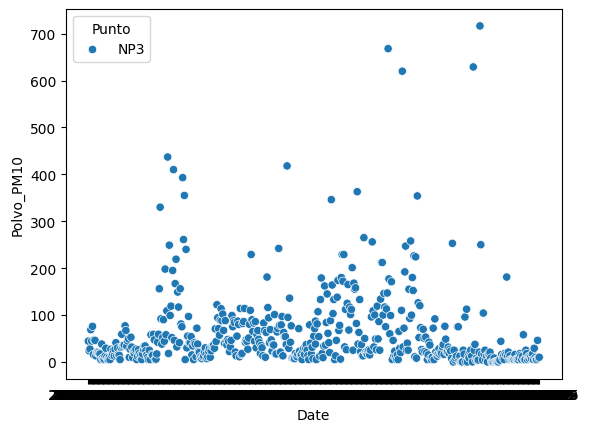

In [ ]:
sns.scatterplot(data=df_polvo.loc[df_polvo['Punto']=='NP3'], x='Date', y='Polvo_PM10', hue = 'Punto')

In [ ]:
df_polvo['Date'] = pd.to_datetime(df_polvo['Date'])

In [ ]:
df_polvo.drop(columns=['WDir','HWDir', 'Polvo_PM10' ], inplace=True)

In [ ]:
# Imputar los valores nulos únicamente en las columnas numéricas
numerical_cols = df_polvo.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas
df_polvo[numerical_cols] = df_polvo[numerical_cols].fillna(df_polvo[numerical_cols].mean())

In [ ]:
df_polvo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3006 non-null   datetime64[ns]
 1   TempOut    3006 non-null   float64       
 2   HiTemp     3006 non-null   float64       
 3   LowTemp    3006 non-null   float64       
 4   OutHum     3006 non-null   float64       
 5   DewPt.     3006 non-null   float64       
 6   WSpeed     3006 non-null   float64       
 7   WRun       3006 non-null   float64       
 8   WHSpeed    3006 non-null   float64       
 9   WChill     3006 non-null   float64       
 10  HeatIx     3006 non-null   float64       
 11  ThwIx      3006 non-null   float64       
 12  ThswI      3006 non-null   float64       
 13  Bar        3006 non-null   float64       
 14  Rain       3006 non-null   float64       
 15  SolRate    3006 non-null   float64       
 16  SolRad.    3006 non-null   float64       


In [ ]:
df_polvo.isnull().sum()

## Support vector machine

### Analisis preliminar

Hacemos una copia  del dataset tratado para trabajar con este modelo

In [ ]:
df_polvo_svm =  df_polvo
df_polvo_svm

,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,...,WSamp,WTx,iRecept,arcInt,WDir_deg,HWDir_deg,Punto,clase,Date_num,Week
0,2008-02-23,9.800000,18.3,2.7,53.0,-0.058140,7.337500,176.18,69.2,2.6,...,28825,1,86.533333,30,90.0,203.228849,0,False,1.203725e+09,8
1,2008-02-26,8.797872,15.7,3.6,56.0,-0.334043,9.547917,229.26,88.5,2.9,...,32973,1,99.150000,30,67.5,90.000000,0,False,1.203984e+09,9
2,2008-02-29,7.970455,19.1,-1.5,28.5,-11.086364,12.936957,297.67,61.2,-1.9,...,30625,1,95.478261,30,180.0,90.000000,0,False,1.204243e+09,9
3,2008-03-03,5.885417,13.4,-1.9,54.0,-3.410417,8.783333,210.79,62.8,-2.5,...,33406,1,100.000000,30,112.5,135.000000,0,False,1.204502e+09,10
4,2008-03-06,5.006250,13.4,-2.4,15.0,-19.485417,14.245833,341.96,53.1,-5.8,...,33047,1,99.529167,30,225.0,202.500000,0,False,1.204762e+09,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2022-12-06,-2.231250,5.8,-10.7,17.5,-23.920833,2.400000,57.86,24.1,-10.4,...,33461,1,99.958333,30,67.5,0.000000,12,False,1.670285e+09,49
3002,2022-12-06,-2.231250,5.8,-10.7,17.5,-23.920833,2.400000,57.86,24.1,-10.4,...,33461,1,99.958333,30,67.5,0.000000,2,False,1.670285e+09,49
3003,2022-12-08,5.708333,15.3,-5.6,19.0,-15.991667,17.264583,414.40,70.8,-6.6,...,33504,1,100.000000,30,315.0,337.500000,1,False,1.670458e+09,49
3004,2022-12-08,5.708333,15.3,-5.6,19.0,-15.991667,17.264583,414.40,70.8,-6.6,...,33504,1,100.000000,30,315.0,337.500000,9,False,1.670458e+09,49


Creamos una nueva feature a partir de 'Date' para tener la fecha de tipo float64, la nombraremos como 'Date_num', necesitamos hacer esto para tener como indice la fecha y poder trabajar con el modelo.

In [ ]:
df_polvo_svm['Date_num'] = df_polvo_svm['Date'].apply(lambda x: x.timestamp())  # Convertir a timestamp (segundos desde 1970)
df_polvo_svm['Date_num'] = pd.to_numeric(df_polvo_svm['Date_num'], errors='coerce')
df_polvo_svm = df_polvo_svm.drop(columns=['Date'])
df_polvo_svm = df_polvo_svm.drop(columns=['Punto', 'HiTemp', 'LowTemp', 'WTx','SolRate','SolRad.','arcInt'])

Eliminamos features que consideramos que no aportan información relevante o que no son numéricas.

### Separamos los datos de entrenamiento y testeo, y escalamos.

Procedemos a separar el dataset en un set de entrenamiento y de testeo.

In [ ]:
X = df_polvo_svm.iloc[:, :-1]  # Características (input)
y = df_polvo_svm.iloc[:, -2]   # Etiquetas o target (output)

# X: Matriz de características (features)
# y: Vector de etiquetas (labels)

# Separar los datos (80% entrenamiento, 20% prueba)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train_svm))
print("Tamaño del conjunto de prueba:", len(X_test_svm))

Tamaño del conjunto de entrenamiento: 2404
Tamaño del conjunto de prueba: 602


SVM necesita que los datos sean escalados, escalamos los datos de testeo y entrenamiento entonces.

In [ ]:
scaler = StandardScaler()

X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

### Clasificador de vector de soportes

Antes de pasar a SVM, vamos a probar con "Clasificador de vector de soportes" [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), vamos a definir el caso lineal con C=10 primero

In [ ]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train_svm, y_train_svm)


scores = cross_val_score(svm_linear, X_train_svm, y_train_svm, cv=5, scoring='accuracy')

y_pred_svm = svm_linear.predict(X_test_svm)

print("Confusion Matrix:")
print(confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test_svm, y_pred_svm))


Confusion Matrix:
[[527   0]
 [  0  75]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       527
        True       1.00      1.00      1.00        75

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602



Observamos que los resultados son perfectos, por lo tanto, no confiamos en el ajuste que hace este modelo, ahora vamos a probar con un C=0.001 para ajusta la precisión

In [ ]:
svm_linear = SVC(C=0.001, kernel='linear')
svm_linear.fit(X_train_svm, y_train_svm)


scores = cross_val_score(svm_linear, X_train_svm, y_train_svm, cv=5, scoring='accuracy')

y_pred = svm_linear.predict(X_test_svm)

print("Confusion Matrix:")
print(confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test_svm, y_pred_svm))

Confusion Matrix:
[[527   0]
 [  0  75]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       527
        True       1.00      1.00      1.00        75

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602



Aquí también obtenemos resultados perfectos, por lo tanto, los resultados no son confiables

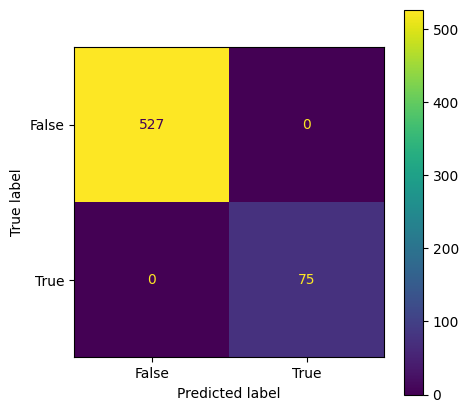

In [ ]:
cm = confusion_matrix(y_test_svm, y_pred_svm, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

Como se obtiene el mismo resultado, elegimos trabajar entonces con Support Vector Machine. A continúacion se intentará graficar los datos segun las 2 primeras features

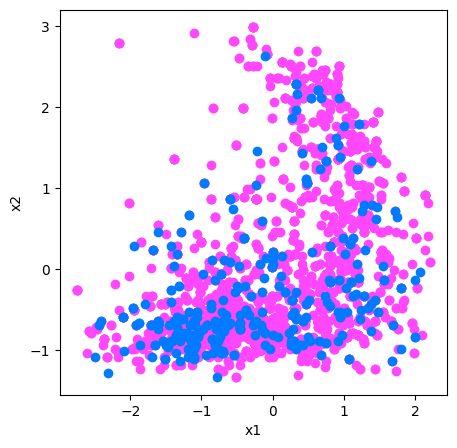

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_svm[y_train_svm==0][:,0], X_train_svm[y_train_svm==0][:,1], c="#ff48fd")
ax.scatter(X_train_svm[y_train_svm==1][:,0], X_train_svm[y_train_svm==1][:,1], c="#007aff")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

### Optimización de parametros con GridSearch y Radial Basis Function (RBF) kernel

In [ ]:
svm_kbf = SVC(kernel='rbf')

grid = GridSearchCV(svm_kbf,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
                     "gamma": [0.5, 1, 2, 3, 4]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.5, 1, 2, 3, 4]},
             scoring='accuracy')

Obtenemos los mejores parametros *gamma* y *C* y todos los scores.

In [ ]:
grid.best_params_


{'C': 5, 'gamma': 0.5}

In [ ]:
grid.cv_results_['mean_test_score']

array([0.87229643, 0.87229643, 0.87229643, 0.87229643, 0.87229643,
       0.87229643, 0.87229643, 0.87229643, 0.87229643, 0.87229643,
       0.87229643, 0.87229643, 0.87229643, 0.87229643, 0.87229643,
       0.93427581, 0.91763773, 0.91722193, 0.91722193, 0.91722193,
       0.94384269, 0.91888514, 0.91722193, 0.91722193, 0.91722193,
       0.94384269, 0.91888514, 0.91722193, 0.91722193, 0.91722193,
       0.94384269, 0.91888514, 0.91722193, 0.91722193, 0.91722193])

### Gráficos

Finalmente intentamos graficar y ver como performa este modelo usando los mejores parametros.

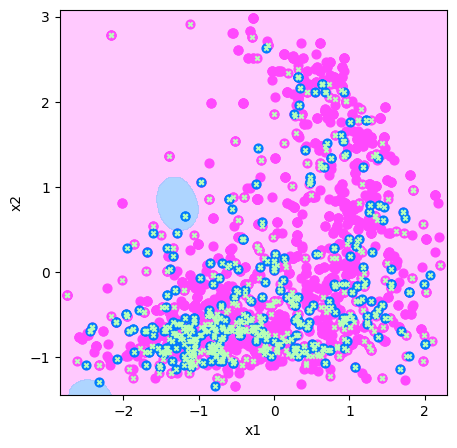

In [ ]:
#X_train_2D = X_train[:, :2]  # Usar las dos primeras características
#X_test_2D = X_test[:, :2]

X_train_2D = X_train_svm[:, [0, 1]]  # Selecciona columnas 28 (Date_num) y 3 (WSpeed)
X_test_2D = X_test_svm[:, [0, 1]]

svm_rbf_best_2D = SVC(kernel='rbf', C=5, gamma=5)  # Ajusta según el mejor modelo encontrado
svm_rbf_best_2D.fit(X_train_2D, y_train_svm)
plot_boundary(X_train_2D, y_train_svm, svm_rbf_best_2D,
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Graficar los vectores de soporte
plt.scatter(svm_rbf_best_2D.support_vectors_[:, 0],
            svm_rbf_best_2D.support_vectors_[:, 1],
            marker="x", color="#b8ffb7", s=10)

plt.show()


### Testeo y resultados

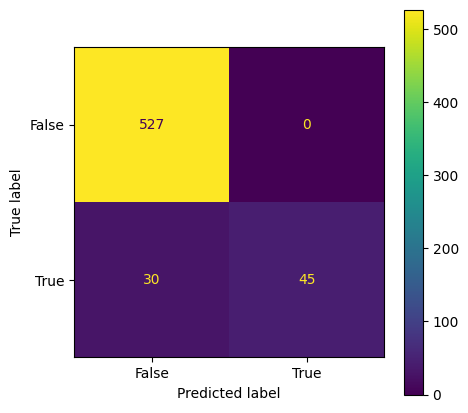

In [ ]:
svm_rbf_best = grid.best_estimator_

y_pred_svm = svm_rbf_best.predict(X_test_svm)

cm = confusion_matrix(y_test_svm, y_pred_svm, labels=svm_rbf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [ ]:
# Evaluación del modelo optimizado
#print("Matriz de confusión (modelo optimizado):")
#print(confusion_matrix(y_test_svm, y_pred_svm))

print("\nReporte de clasificación (modelo optimizado):")
print(classification_report(y_test_svm, y_pred_svm))

print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test_svm, y_pred_svm))


Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       527
        True       1.00      0.60      0.75        75

    accuracy                           0.95       602
   macro avg       0.97      0.80      0.86       602
weighted avg       0.95      0.95      0.94       602


Precisión del modelo optimizado:
0.9501661129568106


Conclusión: La Precisión del modelo optimizado es muy alta, lo que nos lleva a sospechar que no está haciendo una buena predicción, a continuación vamos a probar con otros modelos para determinar cuál puede darnos algo más parecido a la realidad.

## Arboles de Decision

### Analisis preliminar

In [ ]:
df_polvo_arbol=df_polvo

Agregamos una columna con la semana del año para no perder la temporalidad

In [ ]:
# Reemplaza la columna 'date' con la semana del año
df_polvo_arbol['Week'] = df_polvo_arbol['Date'].dt.isocalendar().week

# Imprime el DataFrame actualizado para verificar los cambios
print(df_polvo_arbol.head())

        Date   TempOut  HiTemp  LowTemp  OutHum     DewPt.     WSpeed    WRun  \
0 2008-02-23  9.800000    18.3      2.7    53.0  -0.058140   7.337500  176.18   
1 2008-02-26  8.797872    15.7      3.6    56.0  -0.334043   9.547917  229.26   
2 2008-02-29  7.970455    19.1     -1.5    28.5 -11.086364  12.936957  297.67   
3 2008-03-03  5.885417    13.4     -1.9    54.0  -3.410417   8.783333  210.79   
4 2008-03-06  5.006250    13.4     -2.4    15.0 -19.485417  14.245833  341.96   

   WHSpeed  WChill  ...  WSamp  WTx     iRecept  arcInt  WDir_deg   HWDir_deg  \
0     69.2     2.6  ...  28825    1   86.533333      30      90.0  203.228849   
1     88.5     2.9  ...  32973    1   99.150000      30      67.5   90.000000   
2     61.2    -1.9  ...  30625    1   95.478261      30     180.0   90.000000   
3     62.8    -2.5  ...  33406    1  100.000000      30     112.5  135.000000   
4     53.1    -5.8  ...  33047    1   99.529167      30     225.0  202.500000   

   Punto  clase      Date_

In [ ]:
df_polvo_arbol['Rain'] = (df_polvo_arbol['Rain'] > 0).astype(int)

In [ ]:
# Contar la cantidad total de elementos en la columna
total_elementos = df_polvo_arbol['Rain'].count()

# Sumar los valores de la columna (cantidad de 1's)
suma_elementos = df_polvo_arbol['Rain'].sum()

# Imprimir los resultados
print(f"Total de elementos: {total_elementos}")
print(f"Suma de elementos (cantidad de 1's): {suma_elementos}")

Total de elementos: 3006
Suma de elementos (cantidad de 1's): 481


Label Encoder de la variable Punto que identifica la estacion meteorologica.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# List of columns containing string values
string_columns = [ 'Punto']

# Encode the string columns to numerical values
for col in string_columns:
    df_polvo_arbol[col] = le.fit_transform(df_polvo_arbol[col])

In [ ]:
X = df_polvo_arbol.drop(['Date', 'clase' ], axis=1)
y = df_polvo_arbol['clase']

### Implementación Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Entrenar el árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Obtener las importancias de las características
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print(importances)

Punto        0.255177
Date_num     0.197890
Week         0.064696
WHSpeed      0.037415
ThwIx        0.035336
inDew        0.031307
inHum        0.030166
Bar          0.026155
iHeat        0.025996
ET           0.021798
WSpeed       0.019458
hetD-D       0.018421
ThswI        0.017917
inTemp       0.017650
TempOut      0.017422
Rad.         0.017402
DewPt.       0.017229
SolRad.      0.015852
WSamp        0.015314
iRecept      0.015190
HiTemp       0.014051
OutHum       0.011901
WRun         0.010340
HWDir_deg    0.010197
HiSlE        0.010006
hiUV         0.007446
SolRate      0.007217
uvIndex      0.006742
LowTemp      0.006380
colD-D       0.005571
WDir_deg     0.004798
WChill       0.003923
HeatIx       0.003326
uDose        0.000312
Rain         0.000000
WTx          0.000000
arcInt       0.000000
dtype: float64


### Técnica RFE (Recursive Feature Elimination) para identificar los Features más relevantes.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X, y)

# Mostrar las columnas seleccionadas
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['WHSpeed', 'Bar', 'SolRad.', 'inDew', 'iHeat', 'ET', 'WSamp', 'Punto',
       'Date_num', 'Week'],
      dtype='object')


Usamos las Features más relevantes para modelizar y simplificar el modelo.

In [ ]:
# Crear un nuevo DataFrame con las columnas seleccionadas
X_selected = X[selected_features]

### Grafica utilizando T-SNE

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


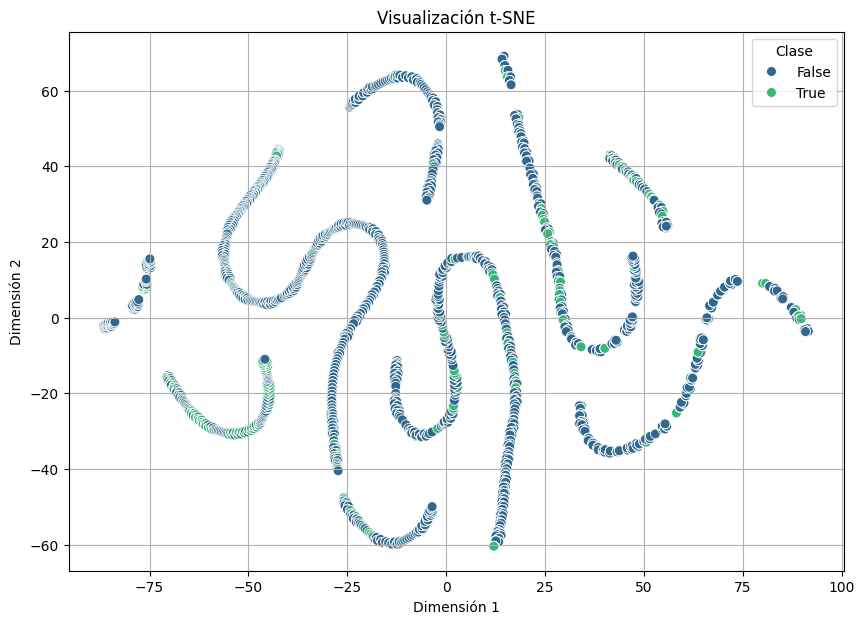

In [ ]:
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Crea un imputer que reemplaza los NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')

# Fit entrene el imputer con los datos y los transforma
X_selected_imputed = imputer.fit_transform(X_selected)

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_selected_imputed)

# Crear un DataFrame para la visualización
df_visual = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_visual['clase'] = df_polvo_arbol['clase'].values

# Visualización
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', hue='clase', palette='viridis', data=df_visual, s=50)
plt.title('Visualización t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()

Se gráfico con T-SNE pero no se ve una clara separación de clases, lo que indica que el modelo podría ser difícil de entrenar.

### Testeo y resultados

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import resample

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creando un Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion='gini',             # 'gini' para Impureza Gini o 'entropy' para ganancia de información
    splitter='best',              # 'best' para la mejor división o 'random' para dividir al azar
    max_depth=8,               # Profundidad máxima del árbol (p.ej., 5 para limitar el crecimiento)
    min_samples_split=2,          # Mínimo número de muestras necesarias para dividir un nodo
    min_samples_leaf=1,           # Mínimo número de muestras requeridas en una hoja
    min_weight_fraction_leaf=0.002, # Mínima fracción de peso requerido en una hoja
    max_features=10,            # Número de características a considerar al buscar la mejor división
    max_leaf_nodes=None,          # Número máximo de nodos hoja
    min_impurity_decrease=0.002,    # Reducción mínima de impureza para dividir un nodo
    class_weight='balanced',      # Ponderación de clases para manejar desbalanceo
    random_state=42               # Asegura reproducibilidad
)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
report_arbol_RFE = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_score_arbol_RFE = accuracy_score(y_test, y_pred)

In [ ]:
print(conf_matrix)

[[234 291]
 [ 23  54]]


In [ ]:
print(report_arbol_RFE)

              precision    recall  f1-score   support

       False       0.91      0.45      0.60       525
        True       0.16      0.70      0.26        77

    accuracy                           0.48       602
   macro avg       0.53      0.57      0.43       602
weighted avg       0.81      0.48      0.55       602



In [ ]:
print("\nPrecisión del modelo:")
print(accuracy_score_arbol_RFE)


Precisión del modelo:
0.47840531561461797


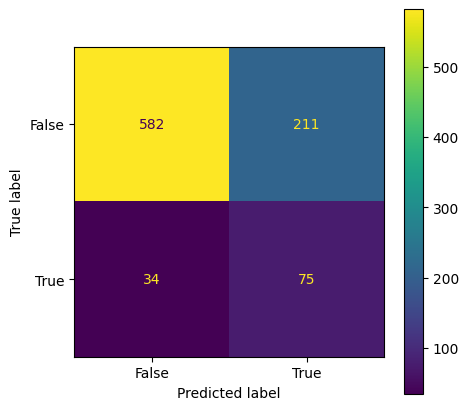

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

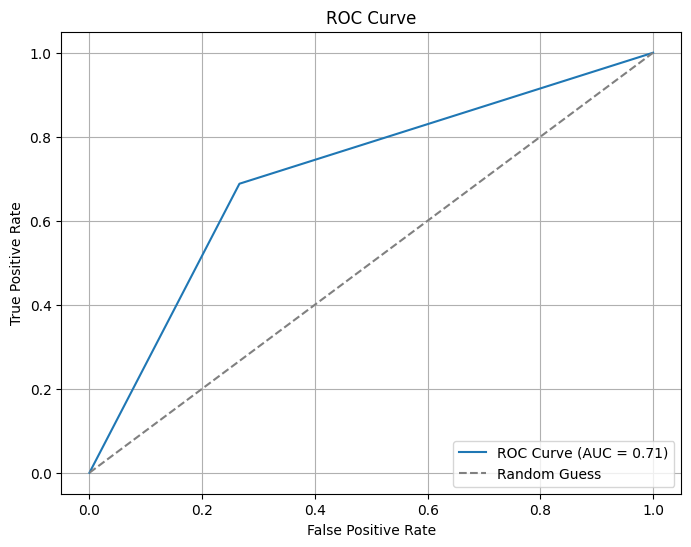

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular el área bajo la curva ROC
auc_score = roc_auc_score(y_test, y_pred)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

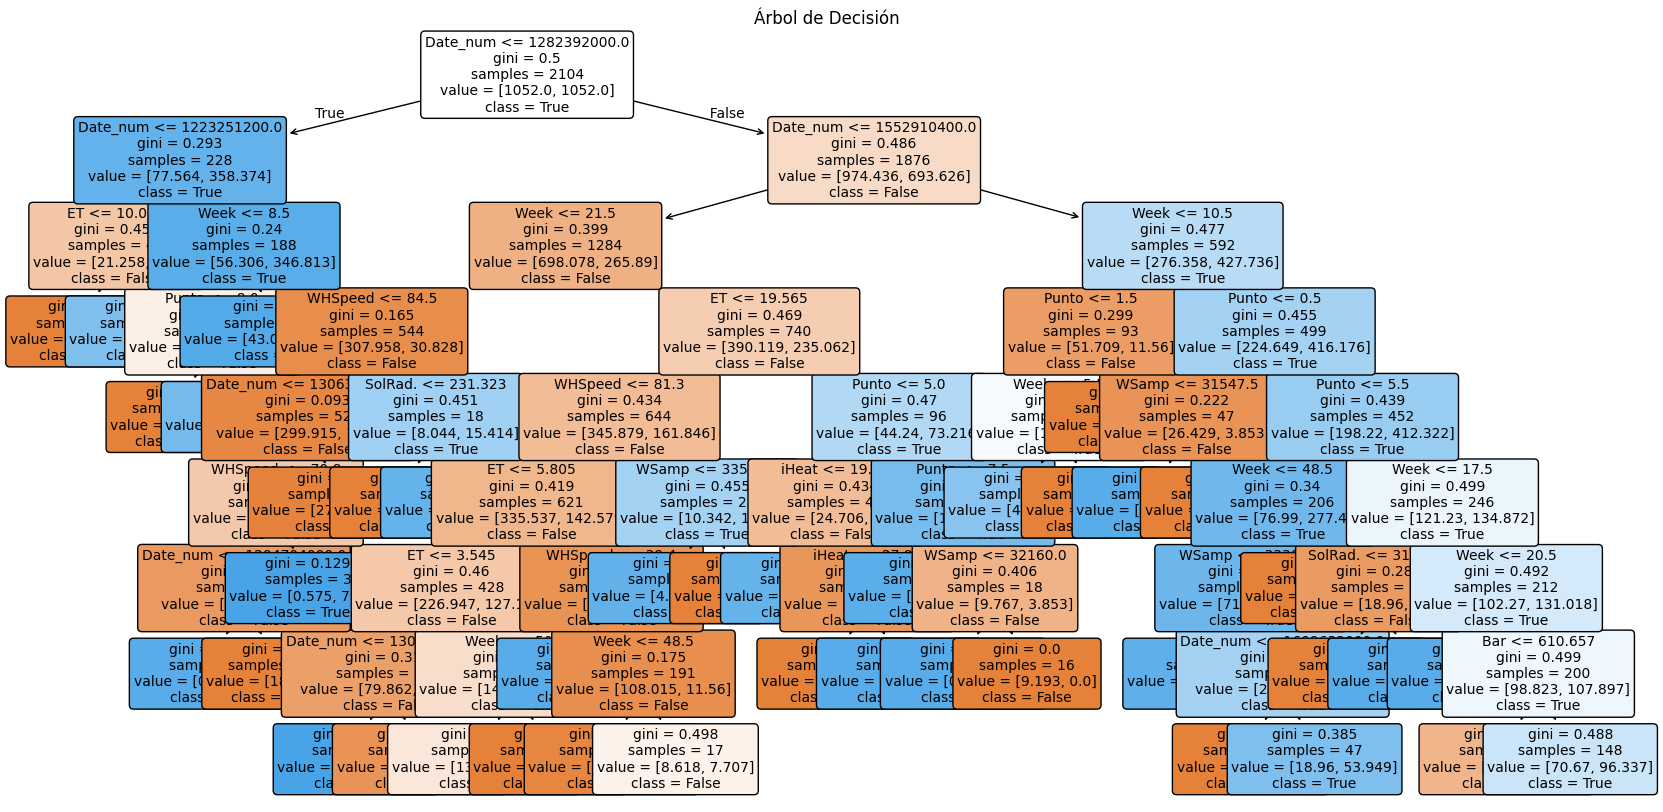

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=clf.classes_.astype(str),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión")
plt.show()

### Implementación de Forward Chaining Cross-Validation

Se separa un 10% de los datos para el test final.

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Definir las divisiones de tiempo
n_splits = 5  # Número de particiones para validación cruzada
tscv = TimeSeriesSplit(n_splits=n_splits)

# Variables para almacenar resultados
reports = []
conf_matrices = []

# Fat Forward Cross-Validation
for train_index, test_index in tscv.split(X_train):
    # Separar conjuntos de entrenamiento y validación
    X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el modelo
    clf.fit(X_train1, y_train1)

    # Hacer predicciones
    y_pred = clf.predict(X_test1)

    # Evaluar el modelo
    report = classification_report(y_test1, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test1, y_pred)

    # Almacenar resultados
    reports.append(report)
    conf_matrices.append(conf_matrix)

# Análisis de resultados
for i, (report, conf_matrix) in enumerate(zip(reports, conf_matrices), start=1):
    print(f"\n=== Fold {i} ===")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)

# Promediar métricas (opcional)
avg_precision = np.mean([report['weighted avg']['precision'] for report in reports])
avg_recall = np.mean([report['weighted avg']['recall'] for report in reports])
avg_f1 = np.mean([report['weighted avg']['f1-score'] for report in reports])

print(f"\n=== Final Metrics ===")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1-Score: {avg_f1:.2f}")



=== Fold 1 ===
Classification Report:
{'False': {'precision': 0.9142857142857143, 'recall': 0.8347826086956521, 'f1-score': 0.8727272727272727, 'support': 345.0}, 'True': {'precision': 0.32941176470588235, 'recall': 0.509090909090909, 'f1-score': 0.4, 'support': 55.0}, 'accuracy': 0.79, 'macro avg': {'precision': 0.6218487394957983, 'recall': 0.6719367588932805, 'f1-score': 0.6363636363636364, 'support': 400.0}, 'weighted avg': {'precision': 0.8338655462184874, 'recall': 0.79, 'f1-score': 0.8077272727272726, 'support': 400.0}}
Confusion Matrix:
[[288  57]
 [ 27  28]]

=== Fold 2 ===
Classification Report:
{'False': {'precision': 0.9297658862876255, 'recall': 0.7853107344632768, 'f1-score': 0.8514548238897397, 'support': 354.0}, 'True': {'precision': 0.24752475247524752, 'recall': 0.5434782608695652, 'f1-score': 0.3401360544217687, 'support': 46.0}, 'accuracy': 0.7575, 'macro avg': {'precision': 0.5886453193814365, 'recall': 0.664394497666421, 'f1-score': 0.5957954391557542, 'support':

In [ ]:
# Making predictions
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
report

'              precision    recall  f1-score   support\n\n       False       0.96      0.65      0.77       527\n        True       0.24      0.79      0.37        75\n\n    accuracy                           0.66       602\n   macro avg       0.60      0.72      0.57       602\nweighted avg       0.87      0.66      0.72       602\n'

In [ ]:
conf_matrix

array([[340, 187],
       [ 16,  59]])

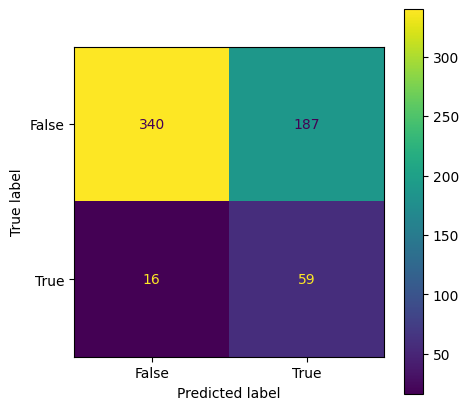

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

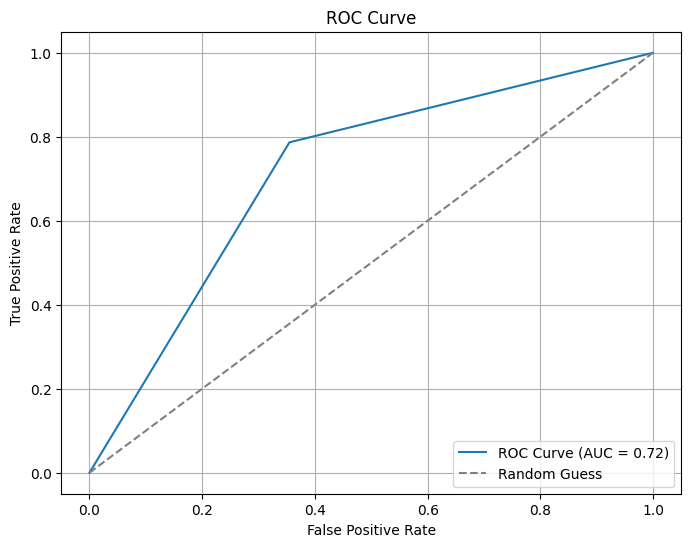

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular el área bajo la curva ROC
auc_score = roc_auc_score(y_test, y_pred)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Conclusión

En el modelo de arbol se probaron distintas configuraciones, la mas robusta fue el entrenado con los features mas relevantes hayados mediante RandomForest. Se mantuvo La curva Roc tanto en el test como la validacion. Esto demuestra una mejor generalizacion.
En los casos donde se hizo balanceo de clases y donde se utilizaron todos los features los resultados de la curva ROC, no se mantuvieron en los datos de Validación con lo cual el modelo no generalizaba y daba resultados inferiores.
La técnica mejoro con la aplicación de Forward Chaining Cross-Validation.

## Random Forest

### Analisis preliminar

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [ ]:
# Preprocesamiento
# One-Hot Encoding para la columna categórica 'Punto'
data = pd.get_dummies(df_polvo, columns=['Punto'], drop_first=True)

In [ ]:
data.head(2)

,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,...,Punto_4,Punto_5,Punto_6,Punto_7,Punto_8,Punto_9,Punto_10,Punto_11,Punto_12,Punto_13
0,2008-02-23,9.800000,18.3,2.7,53.0,-0.058140,7.337500,176.18,69.2,2.6,...,False,False,False,False,False,False,False,False,False,False
1,2008-02-26,8.797872,15.7,3.6,56.0,-0.334043,9.547917,229.26,88.5,2.9,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Separar variables predictoras y objetivo
X = data.drop(columns=['clase', 'Date'])  # Eliminamos la columna 'Date' si no aporta
y = data['clase']

### Testeo y resultados

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train = X_train.astype(int) # Converts all columns to int to avoid the mismatch

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Entrenar el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Realizar predicciones
y_pred = random_forest.predict(X_test)

In [ ]:
# Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de confusión:
[[509  16]
 [ 64  13]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93       525
        True       0.45      0.17      0.25        77

    accuracy                           0.87       602
   macro avg       0.67      0.57      0.59       602
weighted avg       0.83      0.87      0.84       602


Precisión del modelo:
0.867109634551495


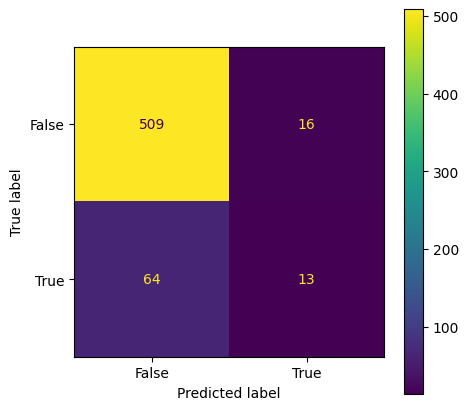

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

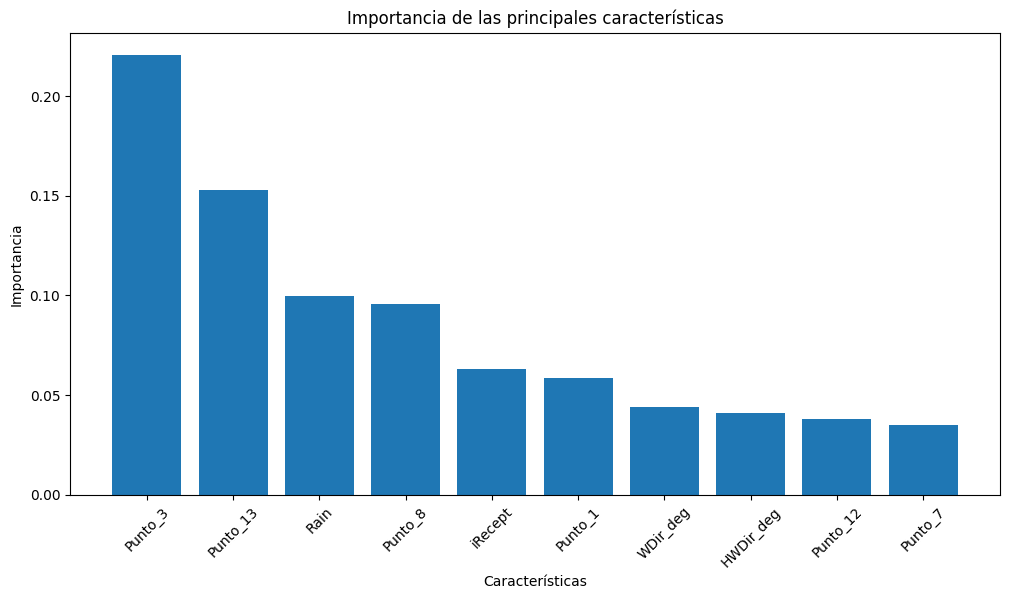

In [ ]:
feature_importances = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X.columns[sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(features[:10], feature_importances[sorted_idx][:10])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las principales características")
plt.xticks(rotation=45)
plt.show()

### Optimizacion con GridSearch

#### Implementación

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el modelo base
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

In [ ]:
# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo de muestras en una hoja
    'max_features': ['sqrt']  # Selección de características
}

In [ ]:
# Configurar la búsqueda por grilla
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 divisiones
    scoring='f1',  # Métrica para evaluar
    verbose=3,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

In [ ]:
# Ejecutar la búsqueda por grilla
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=3)

In [ ]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:" )
grid_search.best_params_

Mejores hiperparámetros:


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

#### Testeo y resultado

In [ ]:
# Evaluar el modelo optimizado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

In [ ]:
# Evaluación del modelo optimizado
print("Matriz de confusión (modelo optimizado):")
print(confusion_matrix(y_test, y_pred_optimized))

report_random_forest_optimized_hp = classification_report(y_test, y_pred_optimized)
print("\nReporte de clasificación (modelo optimizado):")
print(classification_report(y_test, y_pred_optimized))

accuracy_random_forest_optimized_hp = accuracy_score(y_test, y_pred_optimized)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred_optimized))

Matriz de confusión (modelo optimizado):
[[452  73]
 [ 44  33]]

Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

       False       0.91      0.86      0.89       525
        True       0.31      0.43      0.36        77

    accuracy                           0.81       602
   macro avg       0.61      0.64      0.62       602
weighted avg       0.83      0.81      0.82       602


Precisión del modelo optimizado:
0.8056478405315615


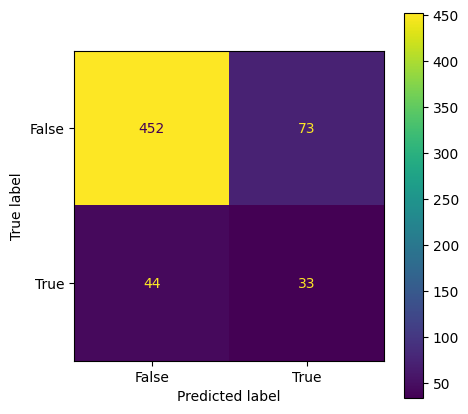

In [ ]:
cm = confusion_matrix(y_test, y_pred_optimized, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

### SMOTE(Synthetic Minority Over-sampling Technique)  - Compensacion desbalance

In [ ]:
# Aplicar SMOTE - se agrega nueva data para balancear el dagtaset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_balanced.describe()

,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,HeatIx,...,Punto_4,Punto_5,Punto_6,Punto_7,Punto_8,Punto_9,Punto_10,Punto_11,Punto_12,Punto_13
count,4198.000000,4198.000000,4198.000000,4198.0,4198.0,4198.000000,4198.000000,4198.000000,4198.000000,4198.0,...,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000
mean,0.000476,0.000238,0.000238,0.0,0.0,0.000238,0.000238,0.000476,0.001429,0.0,...,0.005002,0.050977,0.031444,0.167699,0.058123,0.042401,0.009290,0.001429,0.046212,0.101953
std,0.021824,0.015434,0.015434,0.0,0.0,0.015434,0.015434,0.021824,0.037783,0.0,...,0.070559,0.219976,0.174534,0.373643,0.234004,0.201527,0.095948,0.037783,0.209970,0.302623
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Modelo con ajuste de pesos
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

#### Recalculamos los mejores hyperparametros

In [ ]:
# Búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Métrica para clases desbalanceadas
    verbose=3,
    n_jobs=-1
)

In [ ]:
# Entrenar con datos balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=3)

#### Testeo y resultados

In [ ]:
# Resultados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest_optimized_hp_smote = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest_optimized_hp_smote = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Matriz de confusión:
[[516   9]
 [ 65  12]]

Precisión del modelo optimizado:
0.8056478405315615

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       525
        True       0.57      0.16      0.24        77

    accuracy                           0.88       602
   macro avg       0.73      0.57      0.59       602
weighted avg       0.85      0.88      0.85       602


ROC-AUC: 0.6384539270253556


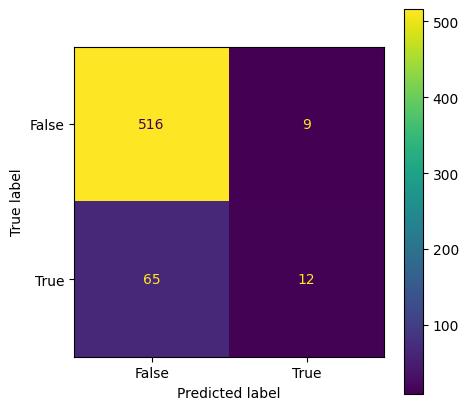

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

### Otimización con Under Sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

In [ ]:
X_train_balanced.describe()

,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,HeatIx,...,Punto_4,Punto_5,Punto_6,Punto_7,Punto_8,Punto_9,Punto_10,Punto_11,Punto_12,Punto_13
count,610.000000,610.0,610.0,610.0,610.0,610.0,610.0,610.000000,610.000000,610.0,...,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,0.001639,0.0,0.0,0.0,0.0,0.0,0.0,0.003279,0.001639,0.0,...,0.006557,0.055738,0.026230,0.188525,0.077049,0.047541,0.014754,0.001639,0.045902,0.100000
std,0.040489,0.0,0.0,0.0,0.0,0.0,0.0,0.057213,0.040489,0.0,...,0.080778,0.229603,0.159948,0.391451,0.266888,0.212968,0.120666,0.040489,0.209444,0.300246
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Modelo con ajuste de pesos
random_forest = RandomForestClassifier(random_state=42, class_weight= 'balanced_subsample')

#### Recalculamos los hyperparametros

In [ ]:
# Búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Métrica para clases desbalanceadas
    verbose=3,
    n_jobs=-1
)

In [ ]:
# Entrenar con datos balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=3)

#### Testeo y resultados

In [ ]:
# Resultados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest_optimized_hp_under_sampler = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest_optimized_hp_under_sampler = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Matriz de confusión:
[[453  72]
 [ 47  30]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.91      0.86      0.88       525
        True       0.29      0.39      0.34        77

    accuracy                           0.80       602
   macro avg       0.60      0.63      0.61       602
weighted avg       0.83      0.80      0.81       602


Precisión del modelo optimizado:
0.8056478405315615

ROC-AUC: 0.6907977736549162


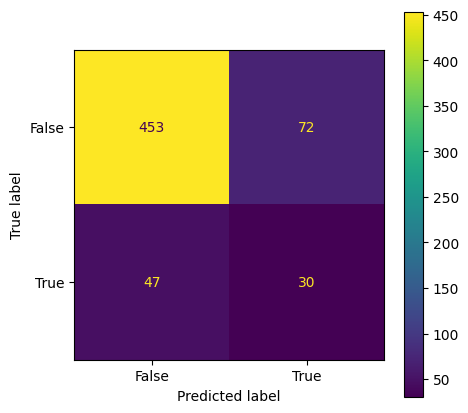

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

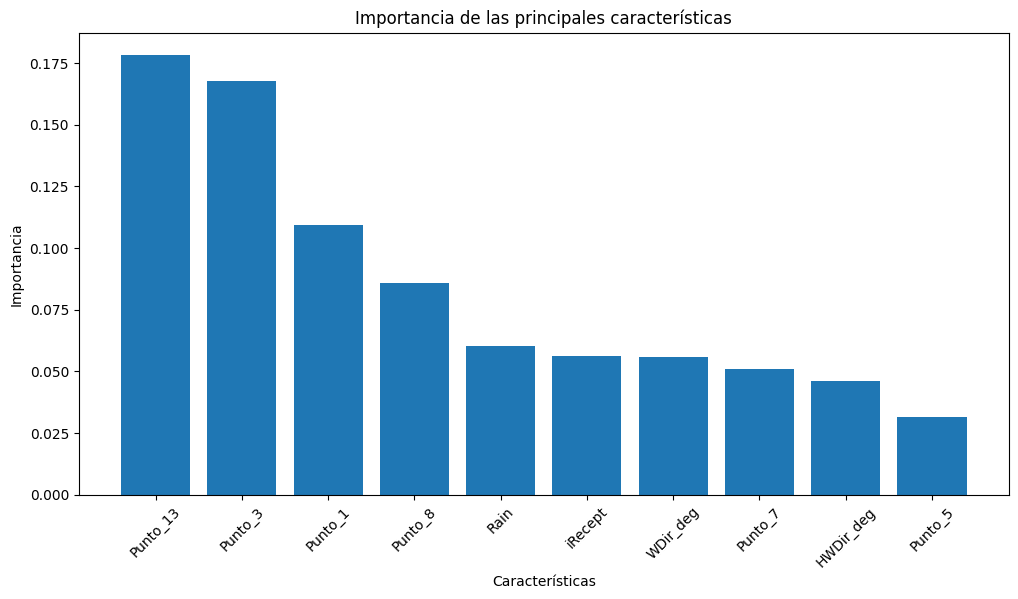

In [ ]:
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X.columns[sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(features[:10], feature_importances[sorted_idx][:10])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las principales características")
plt.xticks(rotation=45)
plt.show()

### Optimización profunda con Under Sampler

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

In [ ]:
# Modelo con ajuste de pesos
random_forest = RandomForestClassifier(random_state=42, class_weight= 'balanced_subsample')

#### Recalculamos los hyperparametros

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Más opciones para el número de árboles
    'max_depth': [None, 10, 20, 30],  # Mayor profundidad máxima de los árboles
    'min_samples_split': [5, 10, 20],  # Más divisiones posibles para nodos
    'min_samples_leaf': [1, 2, 4, 10],  # Menor tamaño de las hojas
    'max_features': ['sqrt', 'log2', None],  # Selección de características
    'bootstrap': [True, False],  # Usar muestreo con o sin reemplazo
    'criterion': ['gini', 'entropy', 'log_loss']  # Diferentes criterios de división
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid,
    n_iter = 1000,
    cv=5,
    scoring='f1',  # Métrica para clases desbalanceadas
    verbose=3,
    n_jobs=-1
)

In [ ]:
# Entrenar con datos balanceados
random_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1', verbose=3)

#### Testeo y resultados

In [ ]:
# Resultados
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'bootstrap': True}
Matriz  = [[395 ,130], [ 20 , 57]]

In [ ]:
mejor = random_search.best_params_
mejor

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
print("Mejores hiperparámetros:", random_search.best_params_)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest_optimized_hp_under_sampler_2 = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest_optimized_hp_under_sampler_2 = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
Matriz de confusión:
[[347 178]
 [ 29  48]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.92      0.66      0.77       525
        True       0.21      0.62      0.32        77

    accuracy                           0.66       602
   macro avg       0.57      0.64      0.54       602
weighted avg       0.83      0.66      0.71       602


Precisión del modelo optimizado:
0.8056478405315615

ROC-AUC: 0.625182436611008


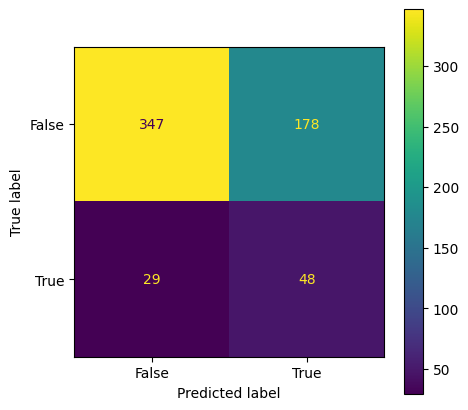

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

## XGBOOST

In [ ]:
!pip install xgboost lightgbm

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Implementación

In [ ]:
# Modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Testeo y resultados

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluación para XGBoost
print("Evaluación para XGBoost:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

report_xgboost = classification_report(y_test, y_pred_xgb)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_xgb))

print("F1-score:", f1_score(y_test, y_pred_xgb, average='weighted'))

accuracy_xgboost = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Evaluación para XGBoost:
Matriz de confusión:
[[352 173]
 [ 23  54]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.94      0.67      0.78       525
        True       0.24      0.70      0.36        77

    accuracy                           0.67       602
   macro avg       0.59      0.69      0.57       602
weighted avg       0.85      0.67      0.73       602

F1-score: 0.7276111791105672
Accuracy: 0.6744186046511628


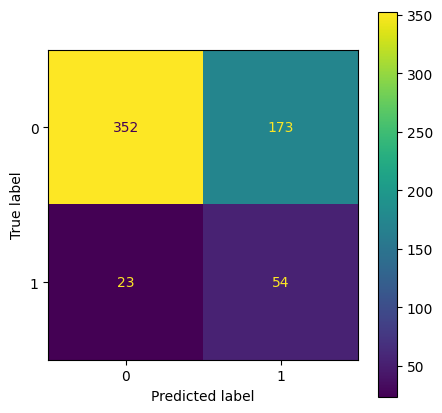

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

## LightGBM

### Implementación

In [ ]:
# Modelo LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
lgbm_model.fit(X_train_balanced, y_train_balanced)
y_pred_lgbm = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 305, number of negative: 305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 610, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

### Testeo y resultados

In [ ]:
# Evaluación para LightGBM
print("\nEvaluación para LightGBM:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lgbm))

report_ligh_gbm = accuracy_score(y_test, y_pred_lgbm)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lgbm))

accuracy_ligh_gbm = classification_report(y_test, y_pred_lgbm)
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("F1-score:", f1_score(y_test, y_pred_lgbm, average='weighted'))


Evaluación para LightGBM:
Matriz de confusión:
[[223 302]
 [ 14  63]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.94      0.42      0.59       525
        True       0.17      0.82      0.29        77

    accuracy                           0.48       602
   macro avg       0.56      0.62      0.44       602
weighted avg       0.84      0.48      0.55       602

Accuracy: 0.4750830564784053
F1-score: 0.5468998186233771


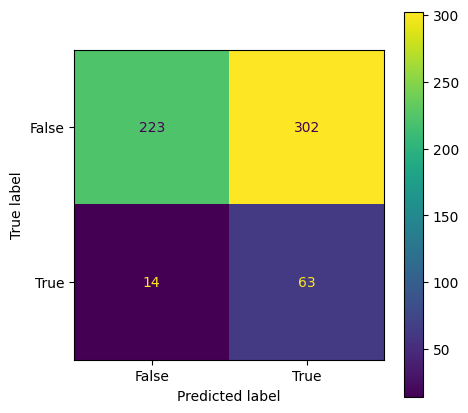

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgbm, labels=lgbm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

## REDES NEURONALES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

### Implementación

In [ ]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear el modelo de red neuronal
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=[Accuracy()])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4407 - val_accuracy: 0.0000e+00 - val_loss: 0.4166
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0000e+00 - loss: 0.3433 - val_accuracy: 0.0000e+00 - val_loss: 0.4124
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0000e+00 - loss: 0.3098 - val_accuracy: 0.0000e+00 - val_loss: 0.4378
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0000e+00 - loss: 0.2816 - val_accuracy: 0.0000e+00 - val_loss: 0.4439
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.2921 - val_accuracy: 0.0000e+00 - val_loss: 0.4446
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.2911 - val_accuracy: 0.0000e+00 - val_loss: 0.4445
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.2752 - val_accuracy: 0.0000e+00 - val_loss: 0.4959
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

### Testeo y resultados

In [ ]:
# Evaluar el modelo en el conjunto de prueba
evaluation = model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.9832 


In [ ]:
print("Evaluación del modelo:", evaluation)

Evaluación del modelo: [1.0815753936767578, 0.0]


In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convertir a valores binarios (umbral 0.5)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Evaluación para Redes Neuronales
print("\nEvaluación para RN:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_rn = accuracy_score(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_rn = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Evaluación para RN:
Matriz de confusión:
[[480  45]
 [ 49  28]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       525
        True       0.38      0.36      0.37        77

    accuracy                           0.84       602
   macro avg       0.65      0.64      0.64       602
weighted avg       0.84      0.84      0.84       602

Accuracy: 0.8438538205980066
F1-score: 0.8420681640998484


In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

Text(0, 0.5, 'Verdadero')

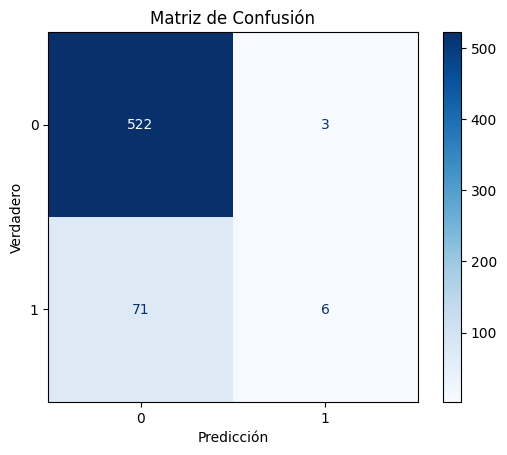

In [ ]:
# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
disp.ax_.set_title("Matriz de Confusión")
disp.ax_.set_xlabel("Predicción")
disp.ax_.set_ylabel("Verdadero")

## KNN

In [ ]:
data = pd.get_dummies(df_polvo, columns=['Punto'], drop_first=True)

# Separar variables predictoras y objetivo
X = data.drop(columns=['clase', 'Date'])  # Eliminamos la columna 'Date' si no aporta
y = data['clase']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Corrección: Asegúrate de imprimir la información de X_train después de la división
print("Número de muestras en X_train después de dividir:", X_train.shape[0])
print("Número de etiquetas en y_train después de dividir:", len(y_train))

Número de muestras en X_train después de dividir: 2404
Número de etiquetas en y_train después de dividir: 2404


In [ ]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler al conjunto de entrenamiento y transformarlo
X_train_scaled = scaler.fit_transform(X_train)

# Convertir el resultado a DataFrame para mejor manejo
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
# Ajustar el scaler al conjunto de entrenamiento y transformarlo
X_test_scaled = scaler.fit_transform(X_test)

# Convertir el resultado a DataFrame para mejor manejo
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test = X_test_scaled_df

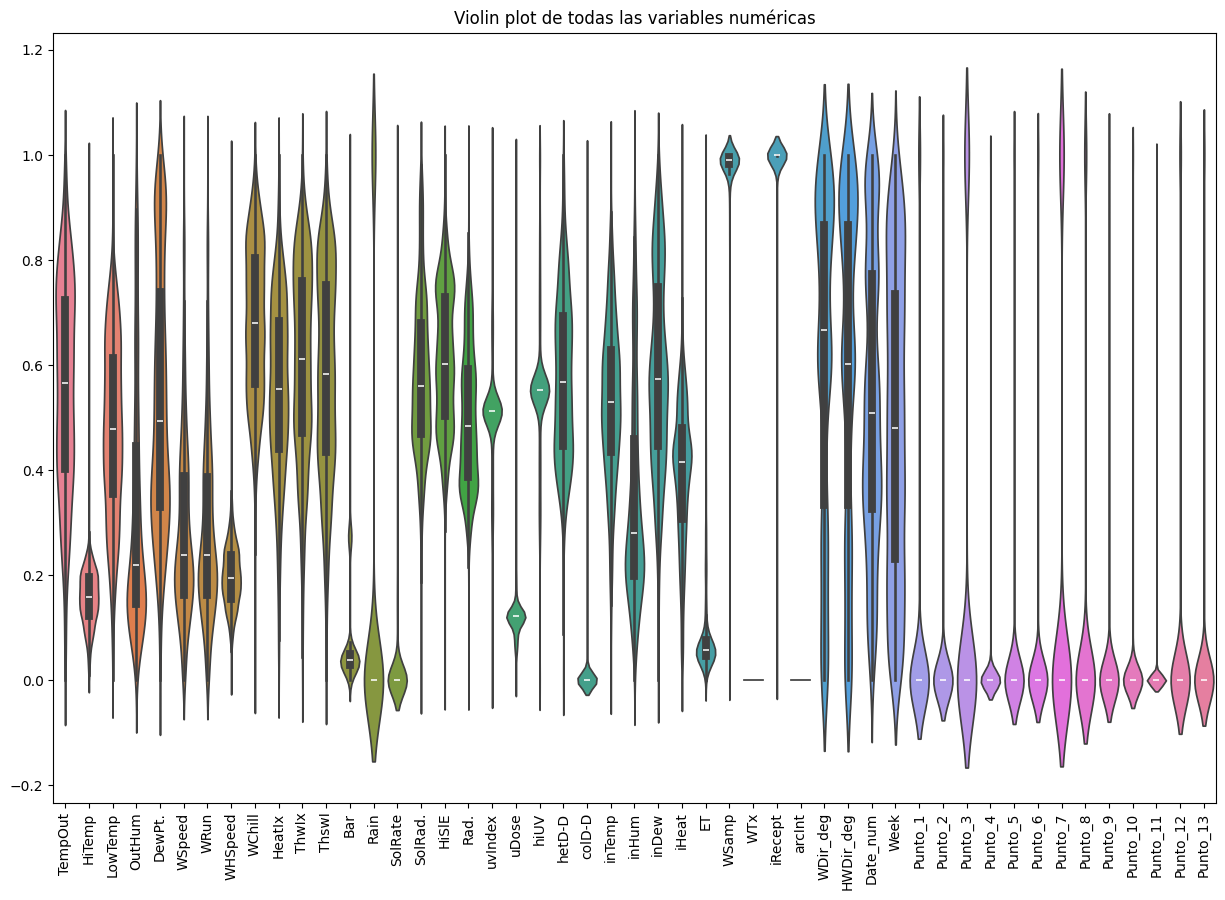

In [ ]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño del gráfico según necesites
sns.violinplot(data=X_train_scaled_df)
plt.xticks(rotation=90)  # Rota las etiquetas para que sean legibles
plt.title('Violin plot de todas las variables numéricas')
plt.show()

### Busqueda de grilla (GridSearch)




In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Asumimos que 'X_train_scaled_df' y 'y_train' están definidos y listos para usar
X_train = X_train_scaled_df  # Usando el DataFrame correctamente nombrado

# Configuración del clasificador KNN
classifier_knn = KNeighborsClassifier()

# Definición de los hiperparámetros a probar
hyperparams = {
    "n_neighbors": np.arange(1, 15),  # Cantidad de vecinos
    "weights": ["uniform", "distance"],  # Cómo se pesan los votos
    "p": np.arange(1.0, 30.0)  # Valores para la distancia de Minkowski
}

# Configuración de GridSearchCV
grid = GridSearchCV(
    classifier_knn,
    hyperparams,
    refit=False,  # Cambio a True para que el modelo se reajuste con los mejores hiperparámetros encontrados
    cv=3,  # Cantidad de validación cruzada
    scoring='f1',  # Métrica que busco maximizar
    n_jobs=-1  # Usar todos los threads y CPUs posibles para hacerlo más rápido
)

# Ejecutar la búsqueda por grilla con los datos de entrenamiento
grid.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados y la mejor puntuación
print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor puntuación F1:", grid.best_score_)

Mejores parámetros encontrados: {'n_neighbors': 1, 'p': 1.0, 'weights': 'uniform'}
Mejor puntuación F1: 0.3461882679011776


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
best_knn_grid = KNeighborsClassifier(**grid.best_params_)
best_knn_grid.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1.0)

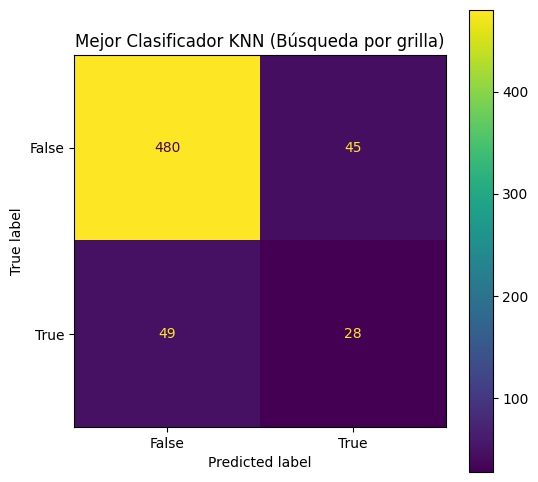

In [ ]:
#Evaluamos
y_pred  = best_knn_grid.predict(X_test)

cm_best_knn_grid = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_grid,
                              display_labels=best_knn_grid.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador KNN (Búsqueda por grilla)");

In [ ]:
# Midamos varias métricas:
print("Mejor Clasificador KNN (Búsqueda por grilla)")
P = np.sum(cm_best_knn_grid[1, :])
N = np.sum(cm_best_knn_grid[0, :])
TP = cm_best_knn_grid[1, 1]
TN = cm_best_knn_grid[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

report_knn = accuracy_score(y_test, y_pred)
accuracy_knn = classification_report(y_test, y_pred)

Mejor Clasificador KNN (Búsqueda por grilla)
Sensibilidad: 0.36363636363636365
Especificidad: 0.9142857142857143
Exactitud balanceada: 0.638961038961039
Precision: 0.3835616438356164
Recuperación: 0.36363636363636365
F1-score: 0.37333333333333335


### Busqueda aleatoria (RamdomizedSearch)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

classifier_knn = KNeighborsClassifier()

hyperparams = {"n_neighbors": np.arange(1, 100),
               "weights": ["uniform", "distance"],
               "p": np.arange(1.0, 100.0)}

# Creamos un método de busqueda por grilla:
grid_random = RandomizedSearchCV(classifier_knn,
                                 hyperparams,
                                 n_iter=1800, # Es el mismo número de iteraciones que el anterior pero la grilla es más grande.
                                 refit=False,
                                 cv=3,
                                 scoring='f1',
                                 n_jobs=-1)

grid_random.fit(X_train, y_train)

In [ ]:
best_knn_grid_random = KNeighborsClassifier(**grid_random.best_params_)
best_knn_grid_random.fit(X_train, y_train)

In [ ]:
#Evaluamos
y_pred  = best_knn_grid_random.predict(X_test)

cm_best_knn_grid_random = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_grid_random,
                              display_labels=best_knn_grid_random.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador KNN (Búsqueda aleatoria)");

In [ ]:
# Midamos varias métricas:
print("Mejor Clasificador KNN (Búsqueda aleatoria)")
P = np.sum(cm_best_knn_grid_random[1, :])
N = np.sum(cm_best_knn_grid_random[0, :])
TP = cm_best_knn_grid_random[1, 1]
TN = cm_best_knn_grid_random[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

report_knn_aleatoria = accuracy_score(y_test, y_pred)
accuracy_knn_aleatoria = classification_report(y_test, y_pred)

### Optuna

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 100)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    p = trial.suggest_float("p", 1.0, 100.0)

    classifier_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

    # Realizamos la validación cruzada
    score = cross_val_score(classifier_knn, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)

    return score.mean()

In [ ]:
def champion_callback(study, frozen_trial):
    """
    Mostramos menos información, sino es demasiado verboso
    """

    winner = study.user_attrs.get("winner", None)

    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [ ]:
# Creamos un estudio de Optuna
# Optuna es un poco verboso, dejamos que solo nos muestre logs de errores
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5000, callbacks=[champion_callback])

In [ ]:
# Obtenemos los mejores hiperparámetros encontrados
best_params = study.best_params
best_params

In [ ]:
# Creamos el clasificador KNeighborsClassifier con los mejores hiperparámetros
classifier_knn_optuna = KNeighborsClassifier(**best_params)
# Entrenamos el clasificador con los datos de entrenamiento
classifier_knn_optuna.fit(X_train, y_train)

In [ ]:
#Evaluamos
y_pred  = classifier_knn_optuna.predict(X_test)

cm_best_knn_optuna = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_optuna,
                              display_labels=classifier_knn_optuna.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador KNN (Usando Optuna)");

In [ ]:
# Midamos varias métricas:
print("Mejor Clasificador KNN (Usando Optuna)")
P = np.sum(cm_best_knn_optuna[1, :])
N = np.sum(cm_best_knn_optuna[0, :])
TP = cm_best_knn_optuna[1, 1]
TN = cm_best_knn_optuna[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especifixcidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

report_knn_optuna = accuracy_score(y_test, y_pred)
accuracy_knn_optuna = classification_report(y_test, y_pred)

## Comparativa de modelos

In [ ]:
# KNN Gridsearch

print("\nReporte de clasificación:")
print(report_knn)

print("\nPrecisión del modelo optimizado:")
print(accuracy_knn)

In [ ]:
# KNN Random search

print("\nReporte de clasificación:")
print(report_knn_aleatoria)

print("\nPrecisión del modelo optimizado:")
print(accuracy_knn_aleatoria)

* Mejor Clasificador KNN (Búsqueda aleatoria)
* Sensibilidad: 0.3246753246753247
* Especificidad: 0.9066666666666666
* Exactitud balanceada: 0.6156709956709956
* Precision: 0.33783783783783783
* Recuperación: 0.3246753246753247
* F1-score: 0.33112582781456956

In [ ]:
# KNN Optuna

print("\nReporte de clasificación:")
print(report_knn_optuna)

print("\nPrecisión del modelo optimizado:")
print(accuracy_knn_optuna)

* Mejor Clasificador KNN (Usando Optuna)
* Sensibilidad: 0.3246753246753247
* Especifixcidad: 0.9085714285714286
* Exactitud balanceada: 0.6166233766233766
* Precision: 0.3424657534246575
* Recuperación: 0.3246753246753247
* F1-score: 0.3333333333333333

In [ ]:
# Modelo Support Vector Machine optmizado con Radial Basis Function (RBF) kernel

print("\nReporte de clasificación:")
print(classification_report(y_test_svm, y_pred_svm))

print("\nPrecisión del modelo Support Vector Machine optmizado con Radial Basis Function (RBF) kernel:")
print(accuracy_score(y_test_svm, y_pred_svm))

In [ ]:
# Arboles de Decision con Recursive Feature Elimination (RFE)

print("\nReporte de clasificación:")
print(report_arbol_RFE)

print("\nPrecisión del Decision Tree con RFE:")
print(accuracy_score_arbol_RFE)

In [ ]:
# Random Forest

print("\nReporte de clasificación:")
print(report_random_forest)

print("\nPrecisión del Decision Tree con RFE:")
print(accuracy_random_forest)

In [ ]:
# Random Forest hyperparametros optimizados

print("\nReporte de clasificación:")
print(report_random_forest_optimized_hp)

print("\nPrecisión del Decision Tree con RFE:")
print(accuracy_random_forest_optimized_hp)

In [ ]:
# Random Forest hyperparametros optimizados y SMOTE

print("\nReporte de clasificación:")
print(report_random_forest_optimized_hp_smote)

print("\nPrecisión del modelo optimizado:")
print(accuracy_random_forest_optimized_hp_smote)

In [ ]:
# Random Forest hyperparametros optimizados y Under Sampler

print("\nReporte de clasificación:")
print(report_random_forest_optimized_hp_under_sampler)

print("\nPrecisión del modelo optimizado:")
print(accuracy_random_forest_optimized_hp_under_sampler)

In [ ]:
# Random Forest hyperparametros optimizados y Under Sampler más profundo

print("\nReporte de clasificación:")
print(report_random_forest_optimized_hp_under_sampler_2)

print("\nPrecisión del modelo optimizado:")
print(accuracy_random_forest_optimized_hp_under_sampler_2)

In [ ]:
# XGBoost

print("\nReporte de clasificación:")
print(report_xgboost)

print("\nPrecisión del modelo optimizado:")
print(accuracy_xgboost)

In [ ]:
# LightGBM

print("\nReporte de clasificación:")
print(report_ligh_gbm)

print("\nPrecisión del modelo optimizado:")
print(accuracy_ligh_gbm)

In [ ]:
# Redes Neuronales

print("\nReporte de clasificación:")
print(report_rn)

print("\nPrecisión del modelo optimizado:")
print(accuracy_rn)